In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle
import joblib
import warnings
warnings.filterwarnings('ignore')
print("imported")

imported


In [2]:
x , y = [],[]
with open("Data/SMSSpamCollection.txt","r") as file:
    data=file.read()
    for data_item in data.split("\n"):
        if len(data_item.split("\t"))==2:
            x.append(data_item.split("\t")[1])
            y.append(data_item.split("\t")[0])

print("succfully read the data from text file and split it into x and y")

succfully read the data from text file and split it into x and y


In [3]:
len(x),len(y)

(5574, 5574)

In [5]:
# data_dict = {"message":[1,2,3,5,1,],"label":[1,2,3,4,5]}
# df = pd.DataFrame(data_dict)
# df

In [6]:
data_dict = {"email_message":x,"label":y}
df = pd.DataFrame(data_dict)
df.head()

,email_message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   email_message  5574 non-null   object
 1   label          5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
for i in range(0 ,len(df)):
    message=re.sub('[^a-zA-Z]',' ',df["email_message"][i])
    message=message.lower()
    df['email_message'][i]=message
df.head()


### number kp htaya or text convert into lowercase





,email_message,label
0,go until jurong point crazy available only ...,ham
1,ok lar joking wif u oni,ham
2,free entry in a wkly comp to win fa cup fina...,spam
3,u dun say so early hor u c already then say,ham
4,nah i don t think he goes to usf he lives aro...,ham


In [10]:
df['label'].value_counts()

label
ham     4827
spam     747
Name: count, dtype: int64

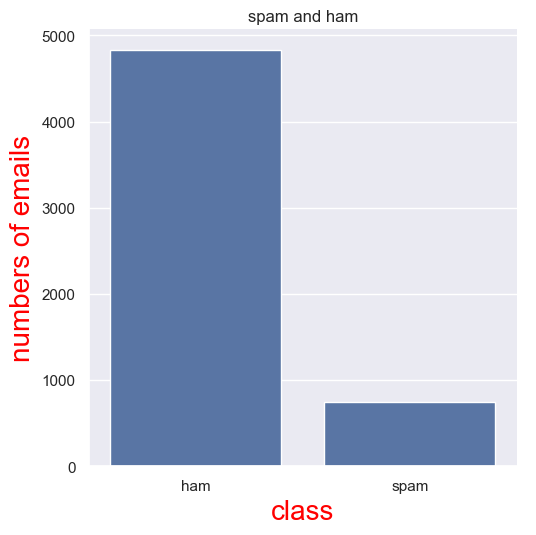

In [9]:
classes=list(df['label'].value_counts().index)
value=list(df['label'].value_counts().values)
sns.set(rc={'figure.figsize':(8,20)})
sns.catplot(x=classes,y=value,kind='bar')
plt.title("spam and ham")
plt.xlabel("class",fontsize=20,color='red')
plt.ylabel("numbers of emails",fontsize=20,color='red')
plt.show()

In [11]:
df.sample(2000)

,email_message,label
2367,tone club your subs has now expired re sub ...,spam
1349,nothing much chillin at home any super bowl ...,ham
5474,well obviously not because all the people in m...,ham
790,gud mrng dear hav a nice day,ham
2524,sorry i ll call later,ham
...,...,...
6,even my brother is not like to speak with me ...,ham
4392,the greatest test of courage on earth is to be...,ham
2322,ok,ham
2356,hello my love how went your day are you a...,ham


In [15]:
ham=df[df['label']=='ham'].sample(1000)
spam=df[df['label']=='spam']
balance_df=pd.concat([ham,spam])

In [16]:
balance_df['label'].value_counts()

label
ham     1000
spam     747
Name: count, dtype: int64

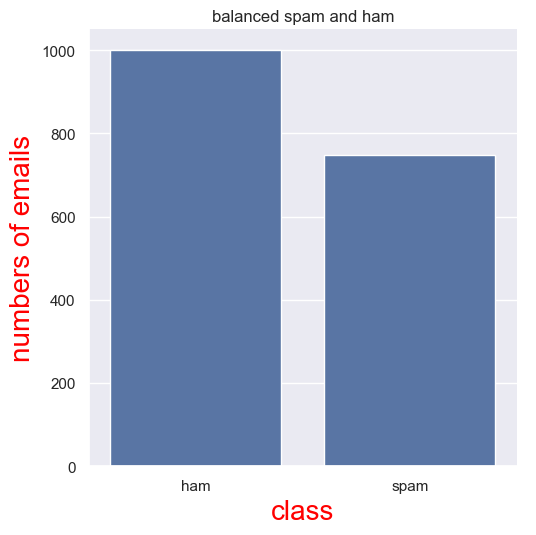

In [17]:
classes=list(balance_df['label'].value_counts().index)
value=list(balance_df['label'].value_counts().values)
sns.set(rc={'figure.figsize':(8,20)})
sns.catplot(x=classes,y=value,kind='bar')
plt.title("balanced spam and ham")
plt.xlabel("class",fontsize=20,color='red')
plt.ylabel("numbers of emails",fontsize=20,color='red')
plt.show()

In [18]:
balance_df['label']=balance_df['label'].map({'ham':0,'spam':1})

In [19]:
balance_df.isnull().sum()

email_message    0
label            0
dtype: int64

In [20]:
balance_df

,email_message,label
2552,i m done c there,0
246,too late i said i have the website i didn t ...,0
4639,captain vijaykanth is doing comedy in captain ...,0
1701,please ask mummy to call father,0
4620,sorry i ll call later in meeting,0
...,...,...
5539,want explicit sex in secs ring ...,1
5542,asked mobile if chatlines inclu in free ...,1
5549,had your contract mobile mnths latest moto...,1
5568,reminder from o to get pounds free call...,1


In [ ]:
print("Duplicate emails:-",balance_df.duplicated().sum())    
    


Duplicate emails:- 138


In [22]:
print("shape of data:-",balance_df.shape)

shape of data:- (1747, 2)


In [23]:
balance_df.drop_duplicates(inplace=True)

In [24]:
print("Duplicate emails:-",balance_df.duplicated().sum()) 

Duplicate emails:- 0


In [25]:
print("shape of data:-",balance_df.shape)

shape of data:- (1609, 2)


In [26]:
x =balance_df['email_message']
y =balance_df['label']

In [27]:
y 

2552    0
246     0
4639    0
1701    0
4620    0
       ..
5539    1
5542    1
5549    1
5568    1
5569    1
Name: label, Length: 1609, dtype: int64

In [29]:
x[0:5]

2552                                i m done  c    there 
246     too late  i said i have the website  i didn t ...
4639    captain vijaykanth is doing comedy in captain ...
1701                      please ask mummy to call father
4620                   sorry  i ll call later in meeting 
Name: email_message, dtype: object

In [30]:
bow_obj=CountVectorizer(max_features=2000, stop_words='english')

In [31]:
x_transformed=bow_obj.fit_transform(x)

In [33]:
dense_matrix=x_transformed.toarray()

In [34]:
dense_matrix.shape

(1609, 2000)

In [35]:
x =dense_matrix

In [37]:
x[0:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x , y ,test_size=0.2)

In [39]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1287, 2000), (322, 2000), (1287,), (322,))

In [40]:
MNB=MultinomialNB()
MNB.fit(x_train,y_train)

MultinomialNB()

In [43]:
MNB.score(x_test,y_test)

0.953416149068323

In [44]:
pred =MNB.predict(x_test)

In [45]:
pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,

In [46]:
confusion_matrix(y_test,pred)

array([[195,   8],
       [  7, 112]], dtype=int64)

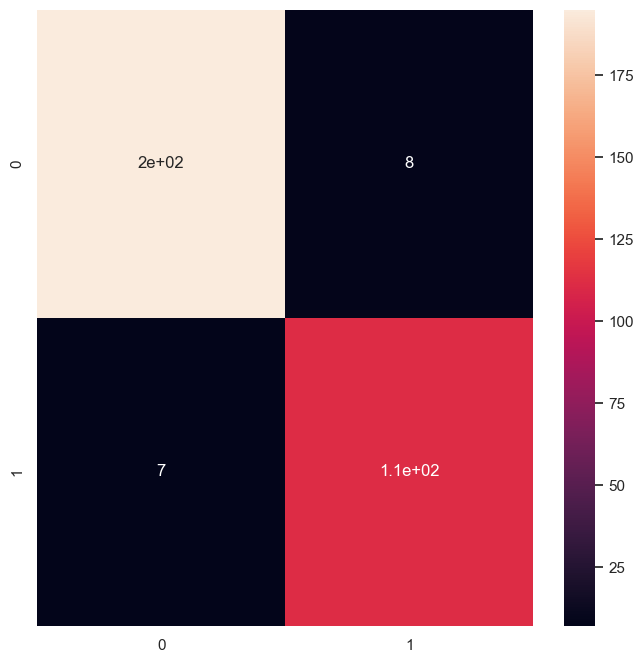

In [47]:
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)
plt.show()

In [49]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       203
           1       0.93      0.94      0.94       119

    accuracy                           0.95       322
   macro avg       0.95      0.95      0.95       322
weighted avg       0.95      0.95      0.95       322



In [50]:
pickle.dump(MNB,open('spam.pkl','wb'))

In [51]:
compaer = {'actual':y_test,'predict':pred}
compaer = pd.DataFrame(compaer)
compaer.head()

,actual,predict
2272,0,0
4639,0,0
1092,0,0
3424,1,1
1774,0,0
